# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 5:
Samples: 10000
Label Counts: {0: 1014, 1: 1014, 2: 952, 3: 1016, 4: 997, 5: 1025, 6: 980, 7: 977, 8: 1003, 9: 1022}
First 20 Labels: [1, 8, 5, 1, 5, 7, 4, 3, 8, 2, 7, 2, 0, 1, 5, 9, 6, 2, 0, 8]

Example of Image 10:
Image - Min Value: 16 Max Value: 227
Image - Shape: (32, 32, 3)
Label - Label Id: 7 Name: horse


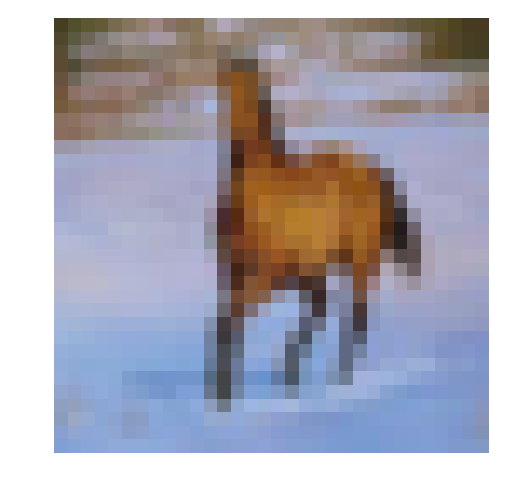

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 5
sample_id = 10
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # DONE: Implement Function
    a = 0.0
    b = 1.0
    min_x = 0
    max_x = 255
    return a + ((x - min_x) * (b - a) / (max_x - min_x))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
def one_hot_item(cls):
    number_of_classes = 10
    ohi = np.zeros(number_of_classes)
    ohi[cls] = 1
    return ohi

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # DONE: Implement Function
    result = np.array([one_hot_item(item) for item in x])
    return result


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # DONE: Implement Function
    image_height, image_width, color_channels = image_shape
    shape = [None, image_height, image_width, color_channels]
    x = tf.placeholder(tf.float32, shape=shape, name='x')
    return x


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # DONE: Implement Function
    shape = [None, n_classes]
    y = tf.placeholder(tf.float32, shape=shape, name='y')
    return y


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # DONE: Implement Function
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    return keep_prob


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [36]:
def conv2d(x, weights, b, conv_strides = (1, 1)):
    
    #2. Apply a convolution to x_tensor using weight and conv_strides.
    #      We recommend you use same padding, but you're welcome to use any padding.
    #3. Add bias
    #4. Add a nonlinear activation to the convolution.
           
    conv_stride_height, conv_stride_width = conv_strides
    x = tf.nn.conv2d(x, weights, strides=[1, conv_stride_height, conv_stride_width, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    x = tf.nn.relu(x)
    return tf.nn.lrn(x, 4, bias=1.0, alpha=0.001 / 9.0, beta=0.75, name='norm1')

def maxpool2d(x, pool_ksize=(2, 2), pool_strides = (2, 2)):
           
    #5. Apply Max Pooling using pool_ksize and pool_strides.
    #      We recommend you use same padding, but you're welcome to use any padding.
    
    pool_kernel_size_height, pool_kernel_size_width = pool_ksize
    pool_stride_height, pool_stride_width = pool_strides
           
    return tf.nn.max_pool(
        x,
        ksize=[1, pool_kernel_size_height, pool_kernel_size_width, 1],
        strides=[1, pool_stride_height, pool_stride_width, 1],
        padding='SAME')

def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # DONE: Implement Function

    # Variable renaming...
    input = x_tensor
    input_shape = input.get_shape().as_list()
    color_channels = input_shape[3]
    filter_size_height, filter_size_width = conv_ksize
    k_output = conv_num_outputs
        
    # 1. Create the weight and bias using conv_ksize, conv_num_outputs and the shape of x_tensor
    weights = tf.Variable(tf.truncated_normal([filter_size_height, filter_size_width, color_channels, k_output]))
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    #bias = tf.Variable(tf.random_uniform(conv_num_outputs, -0.5, 0.5))
    
    x = conv2d(input, weights, bias, conv_strides)
    x = maxpool2d(x, pool_ksize, pool_strides)
 
    return x

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [37]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # DONE: Implement Function
    flattened_image_size = np.prod(np.array(x_tensor.get_shape().as_list()[1:]))
    flattened_x_tensor = tf.reshape(x_tensor, [-1, flattened_image_size])    
    return flattened_x_tensor


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [38]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # DONE: Implement Function

    # Variable renaming
    input = x_tensor
    input_shape = input.get_shape().as_list()
    
    # weights and biases...
    weights_fc = tf.Variable(tf.truncated_normal([input_shape[1], num_outputs]))
    #biases_fc = tf.Variable(tf.truncated_normal([num_outputs]))
    biases_fc = tf.Variable(tf.zeros([num_outputs]))

    fc = tf.add(tf.matmul(input, weights_fc), biases_fc)
    fc = tf.nn.relu(fc)
    
    return fc


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [39]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # DONE: Implement Function
    
    # Variable renaming
    input = x_tensor
    input_shape = input.get_shape().as_list()
    n_classes = num_outputs
    
    # weights and biases...
    weights_out = tf.Variable(tf.random_normal([input_shape[1], n_classes]))
    biases_out = tf.Variable(tf.random_normal([n_classes]))

    # Output Layer - class prediction
    out = tf.add(tf.matmul(input, weights_out), biases_out)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [12]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 32 , 'cvmp2': 128, 'cvmp3': 512}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (5, 5)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 4096*10, 'fc2' : 4096*4, 'fc3' : 4096, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    #x = fully_conn(x, num_outputs['fc2'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 32)
(?, 8, 8, 128)
(?, 4, 4, 512)
(?, 8192)
(?, 40960) with dropout
(?, 10)
(?, 16, 16, 32)
(?, 8, 8, 128)
(?, 4, 4, 512)
(?, 8192)
(?, 40960) with dropout
(?, 10)
Neural Network Built!


## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [13]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # DONE: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability})

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [14]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # DONE: Implement Function
    # Calculate batch loss and accuracy
    train_loss = sess.run(cost, feed_dict={x: feature_batch, y: label_batch, keep_prob: 1.})
    train_acc = sess.run(accuracy, feed_dict={ x: feature_batch, y: label_batch, keep_prob: 1.})
    valid_acc = sess.run(accuracy, feed_dict={ x: valid_features, y: valid_labels, keep_prob: 1.})

    print('Training Loss: {:>10.4f} Trainning Accuracy: {:.6f} Validation Accuracy: {:.6f}'.format(
        train_loss,
        train_acc,
        valid_acc))


### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [20]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .2 # 0.75

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [20]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-07 01:09:04 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 9876278.0000 Trainning Accuracy: 0.275000 Validation Accuracy: 0.350400
2017-06-07 01:24:20 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 5764467.0000 Trainning Accuracy: 0.425000 Validation Accuracy: 0.400000
2017-06-07 01:40:08 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 3412669.5000 Trainning Accuracy: 0.525000 Validation Accuracy: 0.420600
2017-06-07 01:53:57 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 1680414.3750 Trainning Accuracy: 0.600000 Validation Accuracy: 0.455600
2017-06-07 02:08:08 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 1055087.8750 Trainning Accuracy: 0.725000 Validation Accuracy: 0.464000
2017-06-07 02:22:16 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 650779.8750 Trainning Accuracy: 0.800000 Validation Accuracy: 0.472200
2017-06-07 02:36:32 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 512370.0000 Trainning Accuracy: 0.825000 Validation Accuracy: 0.

KeyboardInterrupt: 

# Outros testes

In [30]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 32 , 'cvmp2': 128, 'cvmp3': 512}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (5, 5)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 4096*4, 'fc2' : 4096*2, 'fc3' : 4096, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    #x = fully_conn(x, num_outputs['fc2'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 32)
(?, 8, 8, 128)
(?, 4, 4, 512)
(?, 8192)
(?, 16384) with dropout
(?, 10)
(?, 16, 16, 32)
(?, 8, 8, 128)
(?, 4, 4, 512)
(?, 8192)
(?, 16384) with dropout
(?, 10)
Neural Network Built!


In [35]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .4 # 0.75

In [36]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-07 22:56:16 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 6603350.5000 Trainning Accuracy: 0.250000 Validation Accuracy: 0.312200
2017-06-07 23:07:08 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 2334737.7500 Trainning Accuracy: 0.375000 Validation Accuracy: 0.381200
2017-06-07 23:17:36 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 1054300.2500 Trainning Accuracy: 0.525000 Validation Accuracy: 0.432400
2017-06-07 23:27:03 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 566304.6250 Trainning Accuracy: 0.625000 Validation Accuracy: 0.460800
2017-06-07 23:36:24 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 360649.8125 Trainning Accuracy: 0.775000 Validation Accuracy: 0.456400
2017-06-07 23:45:51 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 128501.9766 Trainning Accuracy: 0.875000 Validation Accuracy: 0.481400
2017-06-07 23:54:16 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 97196.1094 Trainning Accuracy: 0.925000 Validation Accuracy: 0.484

In [37]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .35 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-08 00:26:43 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 4391025.5000 Trainning Accuracy: 0.325000 Validation Accuracy: 0.334000
2017-06-08 00:34:57 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 1660976.6250 Trainning Accuracy: 0.600000 Validation Accuracy: 0.406000
2017-06-08 00:43:11 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 824451.5625 Trainning Accuracy: 0.675000 Validation Accuracy: 0.436400
2017-06-08 00:51:19 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 455781.0625 Trainning Accuracy: 0.725000 Validation Accuracy: 0.448400
2017-06-08 00:59:47 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 276156.8750 Trainning Accuracy: 0.750000 Validation Accuracy: 0.458400
2017-06-08 01:07:57 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 152027.9688 Trainning Accuracy: 0.850000 Validation Accuracy: 0.475400
2017-06-08 01:16:16 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 103479.6250 Trainning Accuracy: 0.925000 Validation Accuracy: 0.471

# este foi o último que eu vi

In [38]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .3 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-08 01:47:32 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 7045248.0000 Trainning Accuracy: 0.275000 Validation Accuracy: 0.335400
2017-06-08 01:55:16 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 2751446.7500 Trainning Accuracy: 0.400000 Validation Accuracy: 0.387600
2017-06-08 02:02:59 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 1622252.7500 Trainning Accuracy: 0.475000 Validation Accuracy: 0.417600
2017-06-08 02:10:41 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 851781.8125 Trainning Accuracy: 0.650000 Validation Accuracy: 0.451800
2017-06-08 02:18:22 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 494769.0938 Trainning Accuracy: 0.700000 Validation Accuracy: 0.458600
2017-06-08 02:26:08 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 309180.1875 Trainning Accuracy: 0.725000 Validation Accuracy: 0.474400
2017-06-08 02:33:55 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 204949.4375 Trainning Accuracy: 0.775000 Validation Accuracy: 0.46

In [39]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .25 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-08 03:05:01 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 5553248.0000 Trainning Accuracy: 0.275000 Validation Accuracy: 0.347200
2017-06-08 03:12:44 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 2263325.7500 Trainning Accuracy: 0.500000 Validation Accuracy: 0.390800
2017-06-08 03:20:27 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 1177011.5000 Trainning Accuracy: 0.650000 Validation Accuracy: 0.436000
2017-06-08 03:28:11 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 769938.2500 Trainning Accuracy: 0.700000 Validation Accuracy: 0.460000
2017-06-08 03:35:55 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 430351.6562 Trainning Accuracy: 0.775000 Validation Accuracy: 0.466800
2017-06-08 03:43:38 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 271903.5938 Trainning Accuracy: 0.800000 Validation Accuracy: 0.465800
2017-06-08 03:51:23 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 182492.2188 Trainning Accuracy: 0.800000 Validation Accuracy: 0.47

In [40]:
# DONE: Tune Parameters
epochs = 20
batch_size = 256 #2**16 #128
keep_probability = .45 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-08 04:22:20 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 4137614.0000 Trainning Accuracy: 0.275000 Validation Accuracy: 0.339400
2017-06-08 04:30:08 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 1302147.3750 Trainning Accuracy: 0.550000 Validation Accuracy: 0.410000
2017-06-08 04:37:58 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 695381.0625 Trainning Accuracy: 0.650000 Validation Accuracy: 0.418600
2017-06-08 04:45:45 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 366531.9375 Trainning Accuracy: 0.725000 Validation Accuracy: 0.435800
2017-06-08 04:53:30 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 76880.3906 Trainning Accuracy: 0.875000 Validation Accuracy: 0.460000
2017-06-08 05:01:12 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 24788.1387 Trainning Accuracy: 0.925000 Validation Accuracy: 0.467400
2017-06-08 05:08:56 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 26239.3320 Trainning Accuracy: 0.950000 Validation Accuracy: 0.470600

In [41]:
# DONE: Tune Parameters
epochs = 20
batch_size = 256 #2**16 #128
keep_probability = .33 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-08 08:11:57 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 6056817.5000 Trainning Accuracy: 0.375000 Validation Accuracy: 0.327000
2017-06-08 08:19:39 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 2428278.7500 Trainning Accuracy: 0.500000 Validation Accuracy: 0.358800
2017-06-08 08:27:31 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 1149792.8750 Trainning Accuracy: 0.625000 Validation Accuracy: 0.418600
2017-06-08 08:35:15 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 628260.3750 Trainning Accuracy: 0.725000 Validation Accuracy: 0.439200
2017-06-08 08:42:58 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 373709.5312 Trainning Accuracy: 0.800000 Validation Accuracy: 0.449600
2017-06-08 08:50:40 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 169776.1562 Trainning Accuracy: 0.850000 Validation Accuracy: 0.463400
2017-06-08 08:58:22 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 116186.9766 Trainning Accuracy: 0.900000 Validation Accuracy: 0.46

# XXXXXXXXXXXXXXXXXXX

In [42]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 12 , 'cvmp2': 48, 'cvmp3': 512}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (5, 5)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 3072*2, 'fc2' : 3072*2, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    #x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    #print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    x = fully_conn(x, num_outputs['fc2'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    x = fully_conn(x, num_outputs['fc3'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 12)
(?, 8, 8, 48)
(?, 3072)
(?, 6144) with dropout
(?, 6144) with dropout
(?, 1000) with dropout
(?, 10)
(?, 16, 16, 12)
(?, 8, 8, 48)
(?, 3072)
(?, 6144) with dropout
(?, 6144) with dropout
(?, 1000) with dropout
(?, 10)
Neural Network Built!


In [44]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .2 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 01:47:03 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 36301940.0000 Trainning Accuracy: 0.075000 Validation Accuracy: 0.105000
2017-06-10 01:49:12 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 13628992.0000 Trainning Accuracy: 0.125000 Validation Accuracy: 0.118200
2017-06-10 01:51:16 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 6927509.0000 Trainning Accuracy: 0.075000 Validation Accuracy: 0.131600
2017-06-10 01:53:21 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 3899760.0000 Trainning Accuracy: 0.125000 Validation Accuracy: 0.149400
2017-06-10 01:55:27 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 2688986.7500 Trainning Accuracy: 0.125000 Validation Accuracy: 0.164400
2017-06-10 01:57:32 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 2241826.0000 Trainning Accuracy: 0.150000 Validation Accuracy: 0.178800
2017-06-10 01:59:36 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 1558900.5000 Trainning Accuracy: 0.175000 Validation Accuracy

In [45]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .25 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 02:07:57 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 35970044.0000 Trainning Accuracy: 0.050000 Validation Accuracy: 0.164000
2017-06-10 02:10:04 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 12032950.0000 Trainning Accuracy: 0.075000 Validation Accuracy: 0.208200
2017-06-10 02:12:09 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 7272341.0000 Trainning Accuracy: 0.125000 Validation Accuracy: 0.229000
2017-06-10 02:14:13 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 4632536.5000 Trainning Accuracy: 0.150000 Validation Accuracy: 0.232000
2017-06-10 02:16:17 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 3280463.5000 Trainning Accuracy: 0.175000 Validation Accuracy: 0.233600
2017-06-10 02:18:21 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 2463222.7500 Trainning Accuracy: 0.225000 Validation Accuracy: 0.240200
2017-06-10 02:20:26 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 1977080.7500 Trainning Accuracy: 0.250000 Validation Accuracy

In [46]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .3 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 02:28:45 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 22347928.0000 Trainning Accuracy: 0.275000 Validation Accuracy: 0.167600
2017-06-10 02:30:49 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 9840000.0000 Trainning Accuracy: 0.150000 Validation Accuracy: 0.203200
2017-06-10 02:32:53 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 5324785.0000 Trainning Accuracy: 0.250000 Validation Accuracy: 0.221800
2017-06-10 02:34:57 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 3895730.5000 Trainning Accuracy: 0.200000 Validation Accuracy: 0.226000
2017-06-10 02:37:02 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 2614830.2500 Trainning Accuracy: 0.225000 Validation Accuracy: 0.229400
2017-06-10 02:39:06 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 1910302.7500 Trainning Accuracy: 0.250000 Validation Accuracy: 0.227800
2017-06-10 02:41:11 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 1350715.6250 Trainning Accuracy: 0.300000 Validation Accuracy:

In [47]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .33 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 02:49:30 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 25322080.0000 Trainning Accuracy: 0.150000 Validation Accuracy: 0.138600
2017-06-10 02:51:34 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 9503542.0000 Trainning Accuracy: 0.150000 Validation Accuracy: 0.164200
2017-06-10 02:53:39 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 4110595.2500 Trainning Accuracy: 0.200000 Validation Accuracy: 0.204600
2017-06-10 02:55:43 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 2829595.7500 Trainning Accuracy: 0.250000 Validation Accuracy: 0.219800
2017-06-10 02:57:46 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 2249486.0000 Trainning Accuracy: 0.250000 Validation Accuracy: 0.228200
2017-06-10 02:59:51 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 1901134.7500 Trainning Accuracy: 0.325000 Validation Accuracy: 0.228200
2017-06-10 03:01:55 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 1431627.2500 Trainning Accuracy: 0.300000 Validation Accuracy:

In [48]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .4 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 03:10:14 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 26760092.0000 Trainning Accuracy: 0.125000 Validation Accuracy: 0.156600
2017-06-10 03:12:17 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 10044114.0000 Trainning Accuracy: 0.075000 Validation Accuracy: 0.166200
2017-06-10 03:14:21 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 4257568.0000 Trainning Accuracy: 0.125000 Validation Accuracy: 0.198400
2017-06-10 03:16:25 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 2420304.5000 Trainning Accuracy: 0.100000 Validation Accuracy: 0.206400
2017-06-10 03:18:28 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 1455561.3750 Trainning Accuracy: 0.250000 Validation Accuracy: 0.218200
2017-06-10 03:20:32 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 1036431.8125 Trainning Accuracy: 0.250000 Validation Accuracy: 0.229600
2017-06-10 03:22:35 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 880669.6250 Trainning Accuracy: 0.300000 Validation Accuracy:

In [49]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .5 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 03:30:53 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 27000436.0000 Trainning Accuracy: 0.100000 Validation Accuracy: 0.194800
2017-06-10 03:32:57 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 8334183.0000 Trainning Accuracy: 0.175000 Validation Accuracy: 0.221400
2017-06-10 03:35:00 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 4459123.0000 Trainning Accuracy: 0.200000 Validation Accuracy: 0.207800
2017-06-10 03:37:04 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 2323365.0000 Trainning Accuracy: 0.175000 Validation Accuracy: 0.215600
2017-06-10 03:39:08 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 1510094.3750 Trainning Accuracy: 0.225000 Validation Accuracy: 0.201000
2017-06-10 03:41:13 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 959806.8750 Trainning Accuracy: 0.200000 Validation Accuracy: 0.210400
2017-06-10 03:43:16 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 588256.5000 Trainning Accuracy: 0.275000 Validation Accuracy: 0

In [50]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .6 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 03:51:35 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 27355628.0000 Trainning Accuracy: 0.250000 Validation Accuracy: 0.270400
2017-06-10 03:53:39 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 7614621.0000 Trainning Accuracy: 0.350000 Validation Accuracy: 0.258400
2017-06-10 03:55:44 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 3001412.5000 Trainning Accuracy: 0.275000 Validation Accuracy: 0.236400
2017-06-10 03:57:48 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 1222037.7500 Trainning Accuracy: 0.225000 Validation Accuracy: 0.210200
2017-06-10 03:59:52 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 593033.3750 Trainning Accuracy: 0.175000 Validation Accuracy: 0.183800
2017-06-10 04:01:57 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 270837.5938 Trainning Accuracy: 0.150000 Validation Accuracy: 0.166000
2017-06-10 04:04:01 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 121249.2266 Trainning Accuracy: 0.175000 Validation Accuracy: 0.

In [51]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .7 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 04:12:20 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 9582000.0000 Trainning Accuracy: 0.200000 Validation Accuracy: 0.276800
2017-06-10 04:14:23 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 2912697.0000 Trainning Accuracy: 0.275000 Validation Accuracy: 0.286800
2017-06-10 04:16:27 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 1146750.7500 Trainning Accuracy: 0.450000 Validation Accuracy: 0.272200
2017-06-10 04:18:31 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 464033.0000 Trainning Accuracy: 0.425000 Validation Accuracy: 0.244000
2017-06-10 04:20:36 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 171118.1562 Trainning Accuracy: 0.425000 Validation Accuracy: 0.210200
2017-06-10 04:22:40 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 75457.2891 Trainning Accuracy: 0.275000 Validation Accuracy: 0.178400
2017-06-10 04:24:45 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 22825.5352 Trainning Accuracy: 0.100000 Validation Accuracy: 0.1300

In [52]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 04:33:07 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 16736638.0000 Trainning Accuracy: 0.300000 Validation Accuracy: 0.306000
2017-06-10 04:35:10 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 4424425.0000 Trainning Accuracy: 0.425000 Validation Accuracy: 0.313400
2017-06-10 04:37:14 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 1391622.6250 Trainning Accuracy: 0.375000 Validation Accuracy: 0.284200
2017-06-10 04:39:18 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 564475.8750 Trainning Accuracy: 0.350000 Validation Accuracy: 0.246800
2017-06-10 04:41:23 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 242914.9219 Trainning Accuracy: 0.300000 Validation Accuracy: 0.190400
2017-06-10 04:43:27 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 45645.7695 Trainning Accuracy: 0.250000 Validation Accuracy: 0.147800
2017-06-10 04:45:31 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 12301.6191 Trainning Accuracy: 0.200000 Validation Accuracy: 0.122

# YYYYYYYYYYYYYYYYYYYYYYYYYYYYY

In [53]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 12 , 'cvmp2': 48, 'cvmp3': 512}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (5, 5)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 3072*2, 'fc2' : 3072*2, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    #x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    #print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    x = fully_conn(x, num_outputs['fc2'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 12)
(?, 8, 8, 48)
(?, 3072)
(?, 6144) with dropout
(?, 6144) with dropout
(?, 10)
(?, 16, 16, 12)
(?, 8, 8, 48)
(?, 3072)
(?, 6144) with dropout
(?, 6144) with dropout
(?, 10)
Neural Network Built!


In [54]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .2 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 04:53:42 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 3016759.0000 Trainning Accuracy: 0.125000 Validation Accuracy: 0.138000
2017-06-10 04:55:36 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 1425243.3750 Trainning Accuracy: 0.200000 Validation Accuracy: 0.251000
2017-06-10 04:57:31 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 1117745.7500 Trainning Accuracy: 0.225000 Validation Accuracy: 0.279000
2017-06-10 04:59:26 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 755420.9375 Trainning Accuracy: 0.225000 Validation Accuracy: 0.310000
2017-06-10 05:01:20 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 557213.3125 Trainning Accuracy: 0.300000 Validation Accuracy: 0.313200
2017-06-10 05:03:15 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 502194.1562 Trainning Accuracy: 0.275000 Validation Accuracy: 0.323000
2017-06-10 05:05:09 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 381322.5000 Trainning Accuracy: 0.350000 Validation Accuracy: 0.32

In [55]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .3 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 05:12:50 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 1557922.2500 Trainning Accuracy: 0.225000 Validation Accuracy: 0.215600
2017-06-10 05:14:45 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 895527.6250 Trainning Accuracy: 0.400000 Validation Accuracy: 0.294000
2017-06-10 05:16:39 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 630823.6250 Trainning Accuracy: 0.400000 Validation Accuracy: 0.338400
2017-06-10 05:18:34 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 488827.5938 Trainning Accuracy: 0.475000 Validation Accuracy: 0.341400
2017-06-10 05:20:28 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 345623.4062 Trainning Accuracy: 0.500000 Validation Accuracy: 0.367600
2017-06-10 05:22:23 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 294027.1875 Trainning Accuracy: 0.500000 Validation Accuracy: 0.374600
2017-06-10 05:24:18 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 225290.7969 Trainning Accuracy: 0.550000 Validation Accuracy: 0.3796

In [56]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .33 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 05:31:59 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 1570541.6250 Trainning Accuracy: 0.225000 Validation Accuracy: 0.284000
2017-06-10 05:33:54 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 988662.8750 Trainning Accuracy: 0.300000 Validation Accuracy: 0.327600
2017-06-10 05:35:49 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 602944.5000 Trainning Accuracy: 0.350000 Validation Accuracy: 0.344600
2017-06-10 05:37:44 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 405215.5938 Trainning Accuracy: 0.450000 Validation Accuracy: 0.353400
2017-06-10 05:39:39 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 232590.2969 Trainning Accuracy: 0.475000 Validation Accuracy: 0.371800
2017-06-10 05:41:34 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 160420.9219 Trainning Accuracy: 0.525000 Validation Accuracy: 0.373600
2017-06-10 05:43:28 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 121627.2656 Trainning Accuracy: 0.575000 Validation Accuracy: 0.3858

In [57]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .4 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 05:51:10 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 2967939.0000 Trainning Accuracy: 0.125000 Validation Accuracy: 0.233800
2017-06-10 05:53:04 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 1537607.2500 Trainning Accuracy: 0.250000 Validation Accuracy: 0.310200
2017-06-10 05:54:59 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 897726.1250 Trainning Accuracy: 0.275000 Validation Accuracy: 0.352400
2017-06-10 05:56:54 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 603405.1875 Trainning Accuracy: 0.375000 Validation Accuracy: 0.379400
2017-06-10 05:58:48 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 394068.6875 Trainning Accuracy: 0.500000 Validation Accuracy: 0.393600
2017-06-10 06:00:43 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 301709.0938 Trainning Accuracy: 0.550000 Validation Accuracy: 0.396000
2017-06-10 06:02:37 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 212431.1719 Trainning Accuracy: 0.600000 Validation Accuracy: 0.400

In [58]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .5 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 06:10:19 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 1769114.7500 Trainning Accuracy: 0.200000 Validation Accuracy: 0.293600
2017-06-10 06:12:14 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 1037014.1875 Trainning Accuracy: 0.300000 Validation Accuracy: 0.353000
2017-06-10 06:14:09 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 608924.3750 Trainning Accuracy: 0.425000 Validation Accuracy: 0.380600
2017-06-10 06:16:05 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 341047.6562 Trainning Accuracy: 0.475000 Validation Accuracy: 0.390800
2017-06-10 06:17:59 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 229936.0000 Trainning Accuracy: 0.600000 Validation Accuracy: 0.396000
2017-06-10 06:19:55 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 131703.2812 Trainning Accuracy: 0.650000 Validation Accuracy: 0.399800
2017-06-10 06:21:49 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 97716.8906 Trainning Accuracy: 0.650000 Validation Accuracy: 0.4046

In [59]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .6 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 06:29:30 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 1484479.2500 Trainning Accuracy: 0.350000 Validation Accuracy: 0.307400
2017-06-10 06:31:24 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 618785.0000 Trainning Accuracy: 0.450000 Validation Accuracy: 0.372600
2017-06-10 06:33:19 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 368114.5938 Trainning Accuracy: 0.500000 Validation Accuracy: 0.392200
2017-06-10 06:35:14 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 264550.3438 Trainning Accuracy: 0.600000 Validation Accuracy: 0.393800
2017-06-10 06:37:08 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 155583.4375 Trainning Accuracy: 0.575000 Validation Accuracy: 0.408800
2017-06-10 06:39:03 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 92140.1406 Trainning Accuracy: 0.650000 Validation Accuracy: 0.408800
2017-06-10 06:40:58 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 58848.1445 Trainning Accuracy: 0.750000 Validation Accuracy: 0.417400

In [60]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .7 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 06:48:40 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 1163486.1250 Trainning Accuracy: 0.300000 Validation Accuracy: 0.323800
2017-06-10 06:50:35 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 526090.6875 Trainning Accuracy: 0.500000 Validation Accuracy: 0.383600
2017-06-10 06:52:30 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 268074.6875 Trainning Accuracy: 0.625000 Validation Accuracy: 0.406200
2017-06-10 06:54:25 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 174913.5312 Trainning Accuracy: 0.650000 Validation Accuracy: 0.420800
2017-06-10 06:56:20 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 109825.5469 Trainning Accuracy: 0.725000 Validation Accuracy: 0.425600
2017-06-10 06:58:14 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 80780.7734 Trainning Accuracy: 0.825000 Validation Accuracy: 0.431800
2017-06-10 07:00:10 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 48434.0312 Trainning Accuracy: 0.800000 Validation Accuracy: 0.429600

# Testes novos

In [61]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 12 , 'cvmp2': 48, 'cvmp3': 512}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (3, 3), 'cvmp3': (5, 5)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 3072*2, 'fc2' : 3072*2, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    #x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    #print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    x = fully_conn(x, num_outputs['fc2'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 12)
(?, 8, 8, 48)
(?, 3072)
(?, 6144) with dropout
(?, 6144) with dropout
(?, 10)
(?, 16, 16, 12)
(?, 8, 8, 48)
(?, 3072)
(?, 6144) with dropout
(?, 6144) with dropout
(?, 10)
Neural Network Built!


In [63]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .2 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 10:12:17 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 875048.0000 Trainning Accuracy: 0.200000 Validation Accuracy: 0.223400
2017-06-10 10:14:21 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 546126.3125 Trainning Accuracy: 0.225000 Validation Accuracy: 0.265800
2017-06-10 10:16:13 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 388774.1250 Trainning Accuracy: 0.200000 Validation Accuracy: 0.278200
2017-06-10 10:18:10 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 267627.0000 Trainning Accuracy: 0.200000 Validation Accuracy: 0.283600
2017-06-10 10:20:00 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 199706.4688 Trainning Accuracy: 0.225000 Validation Accuracy: 0.285000
2017-06-10 10:21:55 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 154257.2812 Trainning Accuracy: 0.250000 Validation Accuracy: 0.297200
2017-06-10 10:23:47 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 126396.1719 Trainning Accuracy: 0.300000 Validation Accuracy: 0.29760

In [64]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .3 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 10:31:15 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 1699732.6250 Trainning Accuracy: 0.175000 Validation Accuracy: 0.226400
2017-06-10 10:33:05 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 980607.3125 Trainning Accuracy: 0.200000 Validation Accuracy: 0.299800
2017-06-10 10:34:58 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 655130.0625 Trainning Accuracy: 0.200000 Validation Accuracy: 0.332600
2017-06-10 10:36:53 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 440072.9062 Trainning Accuracy: 0.300000 Validation Accuracy: 0.341600
2017-06-10 10:38:45 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 293625.8438 Trainning Accuracy: 0.350000 Validation Accuracy: 0.363800
2017-06-10 10:40:43 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 193351.5312 Trainning Accuracy: 0.400000 Validation Accuracy: 0.381600
2017-06-10 10:42:33 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 175139.4219 Trainning Accuracy: 0.425000 Validation Accuracy: 0.3862

In [65]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .33 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 10:50:10 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 498386.3438 Trainning Accuracy: 0.125000 Validation Accuracy: 0.226600
2017-06-10 10:52:00 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 214962.9688 Trainning Accuracy: 0.275000 Validation Accuracy: 0.274400
2017-06-10 10:53:52 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 143021.8281 Trainning Accuracy: 0.425000 Validation Accuracy: 0.300000
2017-06-10 10:55:44 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 107287.1719 Trainning Accuracy: 0.375000 Validation Accuracy: 0.312000
2017-06-10 10:57:34 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 76999.5625 Trainning Accuracy: 0.425000 Validation Accuracy: 0.321400
2017-06-10 10:59:24 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 64431.9922 Trainning Accuracy: 0.400000 Validation Accuracy: 0.312400
2017-06-10 11:01:14 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 43418.7578 Trainning Accuracy: 0.500000 Validation Accuracy: 0.324600
2

In [66]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .5 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 11:08:41 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 1838408.0000 Trainning Accuracy: 0.125000 Validation Accuracy: 0.233400
2017-06-10 11:10:32 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 773584.5000 Trainning Accuracy: 0.325000 Validation Accuracy: 0.308800
2017-06-10 11:12:22 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 423525.8438 Trainning Accuracy: 0.400000 Validation Accuracy: 0.370800
2017-06-10 11:14:12 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 218766.2031 Trainning Accuracy: 0.475000 Validation Accuracy: 0.384200
2017-06-10 11:16:03 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 167697.7969 Trainning Accuracy: 0.525000 Validation Accuracy: 0.388400
2017-06-10 11:17:54 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 115043.2969 Trainning Accuracy: 0.600000 Validation Accuracy: 0.405400
2017-06-10 11:19:45 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 76544.4688 Trainning Accuracy: 0.600000 Validation Accuracy: 0.42840

In [67]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .5 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 11:27:12 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 1130312.2500 Trainning Accuracy: 0.275000 Validation Accuracy: 0.275200
2017-06-10 11:29:12 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 621821.8750 Trainning Accuracy: 0.375000 Validation Accuracy: 0.352400
2017-06-10 11:31:03 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 351785.9375 Trainning Accuracy: 0.425000 Validation Accuracy: 0.377800
2017-06-10 11:32:54 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 200404.1094 Trainning Accuracy: 0.625000 Validation Accuracy: 0.414600
2017-06-10 11:34:47 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 113532.8516 Trainning Accuracy: 0.675000 Validation Accuracy: 0.416000
2017-06-10 11:36:40 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 88588.1094 Trainning Accuracy: 0.675000 Validation Accuracy: 0.413200
2017-06-10 11:38:38 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 68288.4844 Trainning Accuracy: 0.725000 Validation Accuracy: 0.411400

In [68]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .6 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 11:46:16 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 1179835.2500 Trainning Accuracy: 0.275000 Validation Accuracy: 0.295400
2017-06-10 11:48:08 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 608733.5625 Trainning Accuracy: 0.475000 Validation Accuracy: 0.348400
2017-06-10 11:50:01 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 314849.9688 Trainning Accuracy: 0.525000 Validation Accuracy: 0.397600
2017-06-10 11:51:54 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 198945.4844 Trainning Accuracy: 0.525000 Validation Accuracy: 0.419000
2017-06-10 11:53:46 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 126192.1094 Trainning Accuracy: 0.675000 Validation Accuracy: 0.416400
2017-06-10 11:55:40 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 87542.4844 Trainning Accuracy: 0.675000 Validation Accuracy: 0.436200
2017-06-10 11:57:34 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 55310.7109 Trainning Accuracy: 0.725000 Validation Accuracy: 0.441000

In [69]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .7 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 12:05:24 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 1212215.2500 Trainning Accuracy: 0.200000 Validation Accuracy: 0.331800
2017-06-10 12:07:16 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 664988.0000 Trainning Accuracy: 0.475000 Validation Accuracy: 0.361800
2017-06-10 12:09:08 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 352249.8750 Trainning Accuracy: 0.525000 Validation Accuracy: 0.402400
2017-06-10 12:11:01 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 216989.7812 Trainning Accuracy: 0.600000 Validation Accuracy: 0.424800
2017-06-10 12:12:52 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 146257.1875 Trainning Accuracy: 0.575000 Validation Accuracy: 0.423200
2017-06-10 12:14:44 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 102551.3594 Trainning Accuracy: 0.675000 Validation Accuracy: 0.440000
2017-06-10 12:16:35 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 87835.8125 Trainning Accuracy: 0.775000 Validation Accuracy: 0.44140

In [70]:
# DONE: Tune Parameters
epochs = 10
batch_size = 256 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 12:24:03 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 1031516.3125 Trainning Accuracy: 0.150000 Validation Accuracy: 0.295800
2017-06-10 12:25:55 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 419869.4375 Trainning Accuracy: 0.400000 Validation Accuracy: 0.369200
2017-06-10 12:27:46 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 217021.8438 Trainning Accuracy: 0.525000 Validation Accuracy: 0.405000
2017-06-10 12:29:38 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 141182.6719 Trainning Accuracy: 0.625000 Validation Accuracy: 0.412600
2017-06-10 12:31:29 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 79036.6328 Trainning Accuracy: 0.675000 Validation Accuracy: 0.421200
2017-06-10 12:33:20 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 54382.2422 Trainning Accuracy: 0.750000 Validation Accuracy: 0.425000
2017-06-10 12:35:12 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 25978.1016 Trainning Accuracy: 0.825000 Validation Accuracy: 0.432000


# Fim dos Outros Testes

# Novos Testes

In [101]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 12 , 'cvmp2': 48, 'cvmp3': 192}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (3, 3), 'cvmp3': (2, 2)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 3072*2, 'fc2' : 3072*2, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    x = fully_conn(x, num_outputs['fc2'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 12)
(?, 8, 8, 48)
(?, 4, 4, 192)
(?, 3072)
(?, 6144) with dropout
(?, 6144) with dropout
(?, 10)
(?, 16, 16, 12)
(?, 8, 8, 48)
(?, 4, 4, 192)
(?, 3072)
(?, 6144) with dropout
(?, 6144) with dropout
(?, 10)
Neural Network Built!


In [93]:
# DONE: Tune Parameters
epochs = 30
batch_size = 256 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-11 15:51:01 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 5784795.0000 Trainning Accuracy: 0.275000 Validation Accuracy: 0.318400
2017-06-11 15:53:00 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 2083099.7500 Trainning Accuracy: 0.550000 Validation Accuracy: 0.396800
2017-06-11 15:54:59 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 1131857.7500 Trainning Accuracy: 0.675000 Validation Accuracy: 0.428000
2017-06-11 15:56:58 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 902039.3750 Trainning Accuracy: 0.675000 Validation Accuracy: 0.432400
2017-06-11 15:58:57 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 411378.2188 Trainning Accuracy: 0.850000 Validation Accuracy: 0.442800
2017-06-11 16:00:59 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 312909.4375 Trainning Accuracy: 0.825000 Validation Accuracy: 0.452800
2017-06-11 16:03:02 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 91881.0781 Trainning Accuracy: 0.925000 Validation Accuracy: 0.463

KeyboardInterrupt: 

In [103]:
# DONE: Tune Parameters
epochs = 30
batch_size = 256 #2**16 #128
keep_probability = .7 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-11 20:40:11 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 9890714.0000 Trainning Accuracy: 0.250000 Validation Accuracy: 0.258800
2017-06-11 20:42:08 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 3779512.0000 Trainning Accuracy: 0.325000 Validation Accuracy: 0.363800
2017-06-11 20:44:05 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 2256715.7500 Trainning Accuracy: 0.450000 Validation Accuracy: 0.400600
2017-06-11 20:46:03 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 1161868.6250 Trainning Accuracy: 0.550000 Validation Accuracy: 0.416800
2017-06-11 20:48:01 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 723495.5625 Trainning Accuracy: 0.625000 Validation Accuracy: 0.433200
2017-06-11 20:49:59 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 406802.3438 Trainning Accuracy: 0.800000 Validation Accuracy: 0.445200
2017-06-11 20:51:56 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 372857.9062 Trainning Accuracy: 0.800000 Validation Accuracy: 0.4

In [104]:
# DONE: Tune Parameters
epochs = 30
batch_size = 256 #2**16 #128
keep_probability = .6 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-11 21:38:57 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 11334460.0000 Trainning Accuracy: 0.275000 Validation Accuracy: 0.300600
2017-06-11 21:40:54 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 6131644.0000 Trainning Accuracy: 0.325000 Validation Accuracy: 0.355400
2017-06-11 21:42:51 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 2851020.2500 Trainning Accuracy: 0.400000 Validation Accuracy: 0.399000
2017-06-11 21:44:51 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 1634084.0000 Trainning Accuracy: 0.500000 Validation Accuracy: 0.409200
2017-06-11 21:46:50 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 1135002.6250 Trainning Accuracy: 0.600000 Validation Accuracy: 0.429200
2017-06-11 21:48:49 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 842346.5000 Trainning Accuracy: 0.600000 Validation Accuracy: 0.427800
2017-06-11 21:50:48 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 612459.6250 Trainning Accuracy: 0.625000 Validation Accuracy: 0

In [105]:
# DONE: Tune Parameters
epochs = 30
batch_size = 256 #2**16 #128
keep_probability = .5 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-11 22:37:45 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 12507496.0000 Trainning Accuracy: 0.275000 Validation Accuracy: 0.261800
2017-06-11 22:39:43 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 5514729.0000 Trainning Accuracy: 0.425000 Validation Accuracy: 0.360200
2017-06-11 22:41:42 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 2942240.7500 Trainning Accuracy: 0.475000 Validation Accuracy: 0.397800
2017-06-11 22:43:40 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 1867571.6250 Trainning Accuracy: 0.525000 Validation Accuracy: 0.418600
2017-06-11 22:45:39 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 1260735.1250 Trainning Accuracy: 0.625000 Validation Accuracy: 0.414000
2017-06-11 22:47:37 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 959584.3750 Trainning Accuracy: 0.575000 Validation Accuracy: 0.432200
2017-06-11 22:49:35 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 670252.3750 Trainning Accuracy: 0.650000 Validation Accuracy: 0

In [106]:
# DONE: Tune Parameters
epochs = 30
batch_size = 256 #2**16 #128
keep_probability = .4 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-11 23:36:21 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 15446467.0000 Trainning Accuracy: 0.200000 Validation Accuracy: 0.215400
2017-06-11 23:38:18 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 8506596.0000 Trainning Accuracy: 0.150000 Validation Accuracy: 0.300000
2017-06-11 23:40:16 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 4671657.0000 Trainning Accuracy: 0.275000 Validation Accuracy: 0.335800
2017-06-11 23:42:13 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 3021109.5000 Trainning Accuracy: 0.400000 Validation Accuracy: 0.367400
2017-06-11 23:44:11 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 2027746.2500 Trainning Accuracy: 0.425000 Validation Accuracy: 0.376600
2017-06-11 23:46:07 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 1587222.2500 Trainning Accuracy: 0.425000 Validation Accuracy: 0.398000
2017-06-11 23:48:04 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 1122714.0000 Trainning Accuracy: 0.475000 Validation Accuracy:

In [73]:
# DONE: Tune Parameters
epochs = 20
batch_size = 256 #2**16 #128
keep_probability = .33 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 13:13:39 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 7007341.0000 Trainning Accuracy: 0.200000 Validation Accuracy: 0.313400
2017-06-10 13:15:36 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 3972988.0000 Trainning Accuracy: 0.300000 Validation Accuracy: 0.361200
2017-06-10 13:17:34 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 2633126.5000 Trainning Accuracy: 0.325000 Validation Accuracy: 0.386400
2017-06-10 13:19:32 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 1736961.7500 Trainning Accuracy: 0.450000 Validation Accuracy: 0.403400
2017-06-10 13:21:30 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 1370117.2500 Trainning Accuracy: 0.500000 Validation Accuracy: 0.413000
2017-06-10 13:23:27 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 958361.1875 Trainning Accuracy: 0.475000 Validation Accuracy: 0.419800
2017-06-10 13:25:24 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 728548.8750 Trainning Accuracy: 0.475000 Validation Accuracy: 0.

In [74]:
# DONE: Tune Parameters
epochs = 20
batch_size = 256 #2**16 #128
keep_probability = .3 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-10 13:52:40 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 30771622.0000 Trainning Accuracy: 0.175000 Validation Accuracy: 0.130800
2017-06-10 13:54:37 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 11927043.0000 Trainning Accuracy: 0.175000 Validation Accuracy: 0.241400
2017-06-10 13:56:34 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 6772763.0000 Trainning Accuracy: 0.350000 Validation Accuracy: 0.304400
2017-06-10 13:58:30 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 4204565.5000 Trainning Accuracy: 0.425000 Validation Accuracy: 0.336000
2017-06-10 14:00:27 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 3120414.0000 Trainning Accuracy: 0.475000 Validation Accuracy: 0.356000
2017-06-10 14:02:24 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 2246949.2500 Trainning Accuracy: 0.475000 Validation Accuracy: 0.369600
2017-06-10 14:04:21 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 1679961.7500 Trainning Accuracy: 0.500000 Validation Accuracy

# novo treino

In [99]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 16 , 'cvmp2': 64, 'cvmp3': 192}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (2, 2)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 5000, 'fc2' : 5000, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    #x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    #print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    x = fully_conn(x, num_outputs['fc2'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 16)
(?, 8, 8, 64)
(?, 4096)
(?, 5000) with dropout
(?, 5000) with dropout
(?, 10)
(?, 16, 16, 16)
(?, 8, 8, 64)
(?, 4096)
(?, 5000) with dropout
(?, 5000) with dropout
(?, 10)
Neural Network Built!


In [100]:
# DONE: Tune Parameters
epochs = 20
batch_size = 256 #2**16 #128
keep_probability = .3 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


Checking the Training on a Single Batch...
2017-06-11 16:59:24 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 2369141.7500 Trainning Accuracy: 0.175000 Validation Accuracy: 0.187200
2017-06-11 17:01:20 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 1377758.0000 Trainning Accuracy: 0.250000 Validation Accuracy: 0.273400
2017-06-11 17:03:09 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 810266.6250 Trainning Accuracy: 0.275000 Validation Accuracy: 0.305000
2017-06-11 17:04:55 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 533106.6875 Trainning Accuracy: 0.350000 Validation Accuracy: 0.325800
2017-06-11 17:06:42 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 370532.3750 Trainning Accuracy: 0.425000 Validation Accuracy: 0.343400
2017-06-11 17:08:27 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 317470.8125 Trainning Accuracy: 0.450000 Validation Accuracy: 0.349000
2017-06-11 17:10:13 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 242078.5000 Trainning Accuracy: 0.525000 Validation Accuracy: 0.359

In [ ]:
# DONE: Tune Parameters
epochs = 20
batch_size = 256 #2**16 #128
keep_probability = .5 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


In [ ]:
# DONE: Tune Parameters
epochs = 20
batch_size = 256 #2**16 #128
keep_probability = .7 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


In [ ]:
# DONE: Tune Parameters
epochs = 20
batch_size = 256 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)


# Treinando 2 camadas conv 1 camada fc

In [80]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 12 , 'cvmp2': 48, 'cvmp3': 192}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (3, 3), 'cvmp3': (2, 2)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 3072*2, 'fc2' : 3072*2, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    #x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    #print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    #x = fully_conn(x, num_outputs['fc2'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 12)
(?, 8, 8, 48)
(?, 3072)
(?, 6144) with dropout
(?, 10)
(?, 16, 16, 12)
(?, 8, 8, 48)
(?, 3072)
(?, 6144) with dropout
(?, 10)
Neural Network Built!


In [81]:
# DONE: Tune Parameters
epochs = 20
batch_size = 256 #2**16 #128
keep_probability = .3 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-10 18:25:29 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 11678.2051 Trainning Accuracy: 0.300000 Validation Accuracy: 0.289200
2017-06-10 18:26:19 - Epoch  2, CIFAR-10 Batch 1:  Training Loss:  7359.8975 Trainning Accuracy: 0.425000 Validation Accuracy: 0.341600
2017-06-10 18:27:09 - Epoch  3, CIFAR-10 Batch 1:  Training Loss:  5143.0728 Trainning Accuracy: 0.475000 Validation Accuracy: 0.369000
2017-06-10 18:28:00 - Epoch  4, CIFAR-10 Batch 1:  Training Loss:  3363.7539 Trainning Accuracy: 0.525000 Validation Accuracy: 0.388800
2017-06-10 18:28:50 - Epoch  5, CIFAR-10 Batch 1:  Training Loss:  2139.7063 Trainning Accuracy: 0.525000 Validation Accuracy: 0.398600
2017-06-10 18:29:41 - Epoch  6, CIFAR-10 Batch 1:  Training Loss:  1626.9167 Trainning Accuracy: 0.525000 Validation Accuracy: 0.402800
2017-06-10 18:30:31 - Epoch  7, CIFAR-10 Batch 1:  Training Loss:  1034.4563 Trainning Accuracy: 0.550000 Validation Accuracy: 0.403200
2017-

In [82]:
# DONE: Tune Parameters
epochs = 20
batch_size = 256 #2**16 #128
keep_probability = .33 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-10 18:42:07 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 25029.4258 Trainning Accuracy: 0.125000 Validation Accuracy: 0.266000
2017-06-10 18:42:56 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 17139.4648 Trainning Accuracy: 0.275000 Validation Accuracy: 0.329000
2017-06-10 18:43:45 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 10110.6396 Trainning Accuracy: 0.350000 Validation Accuracy: 0.376800
2017-06-10 18:44:36 - Epoch  4, CIFAR-10 Batch 1:  Training Loss:  6532.5151 Trainning Accuracy: 0.525000 Validation Accuracy: 0.390600
2017-06-10 18:45:25 - Epoch  5, CIFAR-10 Batch 1:  Training Loss:  4381.8623 Trainning Accuracy: 0.475000 Validation Accuracy: 0.410200
2017-06-10 18:46:15 - Epoch  6, CIFAR-10 Batch 1:  Training Loss:  3339.3933 Trainning Accuracy: 0.575000 Validation Accuracy: 0.414000
2017-06-10 18:47:05 - Epoch  7, CIFAR-10 Batch 1:  Training Loss:  2164.9087 Trainning Accuracy: 0.675000 Validation Accuracy: 0.418000
2017-

In [83]:
# DONE: Tune Parameters
epochs = 20
batch_size = 256 #2**16 #128
keep_probability = .4 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-10 18:58:43 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 24136.8594 Trainning Accuracy: 0.300000 Validation Accuracy: 0.291000
2017-06-10 18:59:32 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 15998.0781 Trainning Accuracy: 0.425000 Validation Accuracy: 0.345400
2017-06-10 19:00:22 - Epoch  3, CIFAR-10 Batch 1:  Training Loss:  9089.4209 Trainning Accuracy: 0.475000 Validation Accuracy: 0.386400
2017-06-10 19:01:12 - Epoch  4, CIFAR-10 Batch 1:  Training Loss:  6228.0479 Trainning Accuracy: 0.525000 Validation Accuracy: 0.395600
2017-06-10 19:02:02 - Epoch  5, CIFAR-10 Batch 1:  Training Loss:  4651.6060 Trainning Accuracy: 0.575000 Validation Accuracy: 0.415800
2017-06-10 19:02:52 - Epoch  6, CIFAR-10 Batch 1:  Training Loss:  3450.4126 Trainning Accuracy: 0.650000 Validation Accuracy: 0.430200
2017-06-10 19:03:42 - Epoch  7, CIFAR-10 Batch 1:  Training Loss:  2415.9180 Trainning Accuracy: 0.675000 Validation Accuracy: 0.427800
2017-

In [84]:
# DONE: Tune Parameters
epochs = 20
batch_size = 256 #2**16 #128
keep_probability = .5 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-10 19:15:25 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 32191.3750 Trainning Accuracy: 0.200000 Validation Accuracy: 0.245400
2017-06-10 19:16:15 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 18992.1777 Trainning Accuracy: 0.350000 Validation Accuracy: 0.328400
2017-06-10 19:17:05 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 11789.0703 Trainning Accuracy: 0.450000 Validation Accuracy: 0.374000
2017-06-10 19:17:55 - Epoch  4, CIFAR-10 Batch 1:  Training Loss:  7836.3955 Trainning Accuracy: 0.500000 Validation Accuracy: 0.392600
2017-06-10 19:18:45 - Epoch  5, CIFAR-10 Batch 1:  Training Loss:  5421.7578 Trainning Accuracy: 0.600000 Validation Accuracy: 0.406200
2017-06-10 19:19:35 - Epoch  6, CIFAR-10 Batch 1:  Training Loss:  3631.3992 Trainning Accuracy: 0.625000 Validation Accuracy: 0.416200
2017-06-10 19:20:25 - Epoch  7, CIFAR-10 Batch 1:  Training Loss:  2455.7725 Trainning Accuracy: 0.650000 Validation Accuracy: 0.409800
2017-

In [85]:
# DONE: Tune Parameters
epochs = 20
batch_size = 256 #2**16 #128
keep_probability = .6 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-10 19:32:06 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 16875.3477 Trainning Accuracy: 0.250000 Validation Accuracy: 0.297400
2017-06-10 19:32:56 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 11813.9395 Trainning Accuracy: 0.350000 Validation Accuracy: 0.348200
2017-06-10 19:33:46 - Epoch  3, CIFAR-10 Batch 1:  Training Loss:  6624.9634 Trainning Accuracy: 0.475000 Validation Accuracy: 0.379200
2017-06-10 19:34:36 - Epoch  4, CIFAR-10 Batch 1:  Training Loss:  3777.4902 Trainning Accuracy: 0.500000 Validation Accuracy: 0.401000
2017-06-10 19:35:27 - Epoch  5, CIFAR-10 Batch 1:  Training Loss:  2643.3989 Trainning Accuracy: 0.575000 Validation Accuracy: 0.405000
2017-06-10 19:36:17 - Epoch  6, CIFAR-10 Batch 1:  Training Loss:  1665.7585 Trainning Accuracy: 0.650000 Validation Accuracy: 0.424400
2017-06-10 19:37:07 - Epoch  7, CIFAR-10 Batch 1:  Training Loss:  1234.0553 Trainning Accuracy: 0.750000 Validation Accuracy: 0.427600
2017-

In [86]:
# DONE: Tune Parameters
epochs = 20
batch_size = 256 #2**16 #128
keep_probability = .7 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-10 19:48:49 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 27581.1504 Trainning Accuracy: 0.200000 Validation Accuracy: 0.289400
2017-06-10 19:49:39 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 15932.2266 Trainning Accuracy: 0.350000 Validation Accuracy: 0.339400
2017-06-10 19:50:29 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 12762.5400 Trainning Accuracy: 0.375000 Validation Accuracy: 0.353600
2017-06-10 19:51:19 - Epoch  4, CIFAR-10 Batch 1:  Training Loss:  7471.0498 Trainning Accuracy: 0.500000 Validation Accuracy: 0.397800
2017-06-10 19:52:09 - Epoch  5, CIFAR-10 Batch 1:  Training Loss:  3318.4937 Trainning Accuracy: 0.650000 Validation Accuracy: 0.415600
2017-06-10 19:52:58 - Epoch  6, CIFAR-10 Batch 1:  Training Loss:  2232.4568 Trainning Accuracy: 0.725000 Validation Accuracy: 0.416000
2017-06-10 19:53:48 - Epoch  7, CIFAR-10 Batch 1:  Training Loss:  1531.5457 Trainning Accuracy: 0.775000 Validation Accuracy: 0.422800
2017-

In [87]:
# DONE: Tune Parameters
epochs = 20
batch_size = 256 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-10 20:05:30 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 17203.9727 Trainning Accuracy: 0.200000 Validation Accuracy: 0.272400
2017-06-10 20:06:20 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 11268.8457 Trainning Accuracy: 0.350000 Validation Accuracy: 0.350800
2017-06-10 20:07:10 - Epoch  3, CIFAR-10 Batch 1:  Training Loss:  6809.5781 Trainning Accuracy: 0.500000 Validation Accuracy: 0.378400
2017-06-10 20:08:00 - Epoch  4, CIFAR-10 Batch 1:  Training Loss:  4728.5386 Trainning Accuracy: 0.450000 Validation Accuracy: 0.385800
2017-06-10 20:08:50 - Epoch  5, CIFAR-10 Batch 1:  Training Loss:  3044.5679 Trainning Accuracy: 0.575000 Validation Accuracy: 0.407200
2017-06-10 20:09:40 - Epoch  6, CIFAR-10 Batch 1:  Training Loss:  2039.4238 Trainning Accuracy: 0.600000 Validation Accuracy: 0.415600
2017-06-10 20:10:30 - Epoch  7, CIFAR-10 Batch 1:  Training Loss:  1415.7285 Trainning Accuracy: 0.725000 Validation Accuracy: 0.416000
2017-

# Tests after reading tensorflow tutorial

In [22]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 32, 'cvmp2': 64, 'cvmp3': 128}
    conv_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 1024*2, 'fc2' : 1024*2, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    x = fully_conn(x, num_outputs['fc2'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy{}
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 2048) with dropout
(?, 2048) with dropout
(?, 10)
(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 2048) with dropout
(?, 2048) with dropout
(?, 10)
Neural Network Built!


In [23]:
# DONE: Tune Parameters
epochs = 20
batch_size = 128 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-15 12:30:51 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 103130.2266 Trainning Accuracy: 0.200000 Validation Accuracy: 0.270800
2017-06-15 12:33:08 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 35653.1211 Trainning Accuracy: 0.375000 Validation Accuracy: 0.318400
2017-06-15 12:35:24 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 22412.9727 Trainning Accuracy: 0.425000 Validation Accuracy: 0.300800
2017-06-15 12:37:40 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 16072.0654 Trainning Accuracy: 0.425000 Validation Accuracy: 0.339000
2017-06-15 12:39:55 - Epoch  5, CIFAR-10 Batch 1:  Training Loss:  5827.7261 Trainning Accuracy: 0.375000 Validation Accuracy: 0.285000
2017-06-15 12:42:12 - Epoch  6, CIFAR-10 Batch 1:  Training Loss:  1607.7531 Trainning Accuracy: 0.200000 Validation Accuracy: 0.185000


KeyboardInterrupt: 

In [24]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 32, 'cvmp2': 64, 'cvmp3': 128}
    conv_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 1024*3, 'fc2' : 1024*3, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    x = fully_conn(x, num_outputs['fc2'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy{}
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 3072) with dropout
(?, 3072) with dropout
(?, 10)
(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 3072) with dropout
(?, 3072) with dropout
(?, 10)
Neural Network Built!


In [25]:
# DONE: Tune Parameters
epochs = 20
batch_size = 128 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-15 12:44:59 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 188998.1406 Trainning Accuracy: 0.275000 Validation Accuracy: 0.280600
2017-06-15 12:47:27 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 76063.3828 Trainning Accuracy: 0.350000 Validation Accuracy: 0.332200
2017-06-15 12:49:56 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 43382.4102 Trainning Accuracy: 0.350000 Validation Accuracy: 0.336800
2017-06-15 12:52:24 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 27793.1055 Trainning Accuracy: 0.350000 Validation Accuracy: 0.328600
2017-06-15 12:54:58 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 15951.1377 Trainning Accuracy: 0.425000 Validation Accuracy: 0.357400
2017-06-15 12:57:33 - Epoch  6, CIFAR-10 Batch 1:  Training Loss:  9387.7568 Trainning Accuracy: 0.425000 Validation Accuracy: 0.330000
2017-06-15 13:00:01 - Epoch  7, CIFAR-10 Batch 1:  Training Loss:  2089.9834 Trainning Accuracy: 0.425000 Validation Accuracy: 0.277400
2017

KeyboardInterrupt: 

In [26]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 32, 'cvmp2': 64, 'cvmp3': 128}
    conv_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 1024*4, 'fc2' : 1024*4, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    x = fully_conn(x, num_outputs['fc2'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy{}
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 4096) with dropout
(?, 4096) with dropout
(?, 10)
(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 4096) with dropout
(?, 4096) with dropout
(?, 10)
Neural Network Built!


In [27]:
# DONE: Tune Parameters
epochs = 20
batch_size = 128 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-15 13:14:39 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 298196.6875 Trainning Accuracy: 0.300000 Validation Accuracy: 0.283400
2017-06-15 13:17:24 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 129758.5000 Trainning Accuracy: 0.400000 Validation Accuracy: 0.350200
2017-06-15 13:20:08 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 90056.9219 Trainning Accuracy: 0.400000 Validation Accuracy: 0.337000
2017-06-15 13:22:52 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 48654.3281 Trainning Accuracy: 0.375000 Validation Accuracy: 0.377000
2017-06-15 13:25:36 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 35819.1562 Trainning Accuracy: 0.500000 Validation Accuracy: 0.364800
2017-06-15 13:28:19 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 20281.1367 Trainning Accuracy: 0.525000 Validation Accuracy: 0.404000
2017-06-15 13:31:01 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 14938.5938 Trainning Accuracy: 0.600000 Validation Accuracy: 0.390400
201

In [28]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 32, 'cvmp2': 64, 'cvmp3': 128}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (3, 3)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 1024*4, 'fc2' : 1024*4, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    x = fully_conn(x, num_outputs['fc2'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy{}
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 4096) with dropout
(?, 4096) with dropout
(?, 10)
(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 4096) with dropout
(?, 4096) with dropout
(?, 10)
Neural Network Built!


In [29]:
# DONE: Tune Parameters
epochs = 20
batch_size = 128 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-15 14:09:36 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 202636.4219 Trainning Accuracy: 0.325000 Validation Accuracy: 0.297800
2017-06-15 14:12:39 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 94970.5000 Trainning Accuracy: 0.475000 Validation Accuracy: 0.359000
2017-06-15 14:15:43 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 76355.7969 Trainning Accuracy: 0.350000 Validation Accuracy: 0.347400
2017-06-15 14:18:47 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 48478.6836 Trainning Accuracy: 0.475000 Validation Accuracy: 0.388200
2017-06-15 14:21:52 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 25234.6035 Trainning Accuracy: 0.550000 Validation Accuracy: 0.383400
2017-06-15 14:24:56 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 18317.6562 Trainning Accuracy: 0.475000 Validation Accuracy: 0.379400
2017-06-15 14:28:00 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 13091.8213 Trainning Accuracy: 0.550000 Validation Accuracy: 0.372200
2017

In [32]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 32, 'cvmp2': 64, 'cvmp3': 128}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (3, 3)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 1024*4, 'fc2' : 1024*4, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    #x = fully_conn(x, num_outputs['fc2'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy{}
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 4096) with dropout
(?, 10)
(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 4096) with dropout
(?, 10)
Neural Network Built!


In [33]:
# DONE: Tune Parameters
epochs = 20
batch_size = 128 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-15 15:52:18 - Epoch  1, CIFAR-10 Batch 1:  Training Loss:  5024.2891 Trainning Accuracy: 0.250000 Validation Accuracy: 0.279200
2017-06-15 15:54:59 - Epoch  2, CIFAR-10 Batch 1:  Training Loss:  3710.5415 Trainning Accuracy: 0.225000 Validation Accuracy: 0.303600
2017-06-15 15:57:42 - Epoch  3, CIFAR-10 Batch 1:  Training Loss:  2192.6775 Trainning Accuracy: 0.375000 Validation Accuracy: 0.343600
2017-06-15 16:00:26 - Epoch  4, CIFAR-10 Batch 1:  Training Loss:  1786.2611 Trainning Accuracy: 0.275000 Validation Accuracy: 0.371200
2017-06-15 16:03:04 - Epoch  5, CIFAR-10 Batch 1:  Training Loss:  1190.2750 Trainning Accuracy: 0.400000 Validation Accuracy: 0.375600
2017-06-15 16:05:40 - Epoch  6, CIFAR-10 Batch 1:  Training Loss:   776.3177 Trainning Accuracy: 0.525000 Validation Accuracy: 0.366600
2017-06-15 16:08:16 - Epoch  7, CIFAR-10 Batch 1:  Training Loss:   338.6270 Trainning Accuracy: 0.525000 Validation Accuracy: 0.361800
2017-

KeyboardInterrupt: 

In [34]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 32, 'cvmp2': 64, 'cvmp3': 128}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (3, 3)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 1024*8, 'fc2' : 1024*8, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    #x = fully_conn(x, num_outputs['fc2'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy{}
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 8192) with dropout
(?, 10)
(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 8192) with dropout
(?, 10)
Neural Network Built!


In [35]:
# DONE: Tune Parameters
epochs = 20
batch_size = 128 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-15 16:29:08 - Epoch  1, CIFAR-10 Batch 1:  Training Loss:  8250.3721 Trainning Accuracy: 0.375000 Validation Accuracy: 0.301200
2017-06-15 16:31:58 - Epoch  2, CIFAR-10 Batch 1:  Training Loss:  8624.4746 Trainning Accuracy: 0.350000 Validation Accuracy: 0.302800
2017-06-15 16:34:48 - Epoch  3, CIFAR-10 Batch 1:  Training Loss:  4633.6152 Trainning Accuracy: 0.375000 Validation Accuracy: 0.375800
2017-06-15 16:37:51 - Epoch  4, CIFAR-10 Batch 1:  Training Loss:  5432.2632 Trainning Accuracy: 0.325000 Validation Accuracy: 0.318200
2017-06-15 16:40:54 - Epoch  5, CIFAR-10 Batch 1:  Training Loss:  3165.2131 Trainning Accuracy: 0.575000 Validation Accuracy: 0.371600
2017-06-15 16:43:58 - Epoch  6, CIFAR-10 Batch 1:  Training Loss:  2757.2380 Trainning Accuracy: 0.475000 Validation Accuracy: 0.392400
2017-06-15 16:46:59 - Epoch  7, CIFAR-10 Batch 1:  Training Loss:  1993.9922 Trainning Accuracy: 0.550000 Validation Accuracy: 0.451400
2017-

In [36]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 32, 'cvmp2': 64, 'cvmp3': 128}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (3, 3)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 1024*16, 'fc2' : 1024*16, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    #x = fully_conn(x, num_outputs['fc2'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy{}
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 16384) with dropout
(?, 10)
(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 16384) with dropout
(?, 10)
Neural Network Built!


In [37]:
# DONE: Tune Parameters
epochs = 20
batch_size = 128 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-15 17:28:16 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 11699.4346 Trainning Accuracy: 0.325000 Validation Accuracy: 0.288200
2017-06-15 17:31:43 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 10681.3936 Trainning Accuracy: 0.300000 Validation Accuracy: 0.298200
2017-06-15 17:35:20 - Epoch  3, CIFAR-10 Batch 1:  Training Loss:  6315.2720 Trainning Accuracy: 0.425000 Validation Accuracy: 0.384200
2017-06-15 17:39:07 - Epoch  4, CIFAR-10 Batch 1:  Training Loss:  6378.4717 Trainning Accuracy: 0.425000 Validation Accuracy: 0.360600
2017-06-15 17:43:04 - Epoch  5, CIFAR-10 Batch 1:  Training Loss:  4888.8545 Trainning Accuracy: 0.500000 Validation Accuracy: 0.399000
2017-06-15 17:46:43 - Epoch  6, CIFAR-10 Batch 1:  Training Loss:  4724.3135 Trainning Accuracy: 0.500000 Validation Accuracy: 0.422600
2017-06-15 17:50:09 - Epoch  7, CIFAR-10 Batch 1:  Training Loss:  3414.0398 Trainning Accuracy: 0.525000 Validation Accuracy: 0.430000
2017-

In [38]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 32, 'cvmp2': 64, 'cvmp3': 128}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (3, 3)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 1024*24, 'fc2' : 1024*24, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    #x = fully_conn(x, num_outputs['fc2'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy{}
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 24576) with dropout
(?, 10)
(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 24576) with dropout
(?, 10)
Neural Network Built!


In [39]:
# DONE: Tune Parameters
epochs = 20
batch_size = 128 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-15 18:39:18 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 14862.3877 Trainning Accuracy: 0.250000 Validation Accuracy: 0.327200
2017-06-15 18:43:13 - Epoch  2, CIFAR-10 Batch 1:  Training Loss:  8170.2939 Trainning Accuracy: 0.550000 Validation Accuracy: 0.390000
2017-06-15 18:47:09 - Epoch  3, CIFAR-10 Batch 1:  Training Loss:  8789.9355 Trainning Accuracy: 0.450000 Validation Accuracy: 0.384600
2017-06-15 18:51:05 - Epoch  4, CIFAR-10 Batch 1:  Training Loss:  6109.1914 Trainning Accuracy: 0.475000 Validation Accuracy: 0.388200
2017-06-15 18:55:05 - Epoch  5, CIFAR-10 Batch 1:  Training Loss:  6463.3213 Trainning Accuracy: 0.550000 Validation Accuracy: 0.424200
2017-06-15 18:58:59 - Epoch  6, CIFAR-10 Batch 1:  Training Loss:  5231.1689 Trainning Accuracy: 0.550000 Validation Accuracy: 0.405800
2017-06-15 19:03:00 - Epoch  7, CIFAR-10 Batch 1:  Training Loss:  4052.6421 Trainning Accuracy: 0.550000 Validation Accuracy: 0.453200
2017-

In [41]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 32, 'cvmp2': 64, 'cvmp3': 128}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (3, 3)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 1024*30, 'fc2' : 1024*30, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    #x = fully_conn(x, num_outputs['fc2'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy{}
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 30720) with dropout
(?, 10)
(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 30720) with dropout
(?, 10)
Neural Network Built!


In [42]:
# DONE: Tune Parameters
epochs = 20
batch_size = 128 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-16 08:10:36 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 13693.7314 Trainning Accuracy: 0.425000 Validation Accuracy: 0.319800
2017-06-16 08:14:54 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 15926.9092 Trainning Accuracy: 0.400000 Validation Accuracy: 0.338400
2017-06-16 08:19:14 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 11346.6758 Trainning Accuracy: 0.500000 Validation Accuracy: 0.393000
2017-06-16 08:23:33 - Epoch  4, CIFAR-10 Batch 1:  Training Loss:  8352.9492 Trainning Accuracy: 0.450000 Validation Accuracy: 0.428800
2017-06-16 08:27:51 - Epoch  5, CIFAR-10 Batch 1:  Training Loss:  8813.4590 Trainning Accuracy: 0.450000 Validation Accuracy: 0.392000
2017-06-16 08:32:09 - Epoch  6, CIFAR-10 Batch 1:  Training Loss:  7417.6514 Trainning Accuracy: 0.525000 Validation Accuracy: 0.414400
2017-06-16 08:36:28 - Epoch  7, CIFAR-10 Batch 1:  Training Loss:  6901.5898 Trainning Accuracy: 0.550000 Validation Accuracy: 0.430600
2017-

2017-06-16

In [16]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 32, 'cvmp2': 64, 'cvmp3': 128}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (3, 3)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 1024*20, 'fc2' : 1024*20, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    x = fully_conn(x, num_outputs['fc2'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy{}
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)




(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 20480) with dropout
(?, 20480) with dropout
(?, 10)
(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 20480) with dropout
(?, 20480) with dropout
(?, 10)
Neural Network Built!


In [17]:
# DONE: Tune Parameters
epochs = 20
batch_size = 128 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-16 22:54:38 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 1482635.7500 Trainning Accuracy: 0.225000 Validation Accuracy: 0.343200
2017-06-17 01:26:35 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 1423748.7500 Trainning Accuracy: 0.350000 Validation Accuracy: 0.358000
2017-06-17 01:42:39 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 1424686.0000 Trainning Accuracy: 0.375000 Validation Accuracy: 0.303800
2017-06-17 01:58:11 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 684561.6875 Trainning Accuracy: 0.475000 Validation Accuracy: 0.400800
2017-06-17 02:13:26 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 654955.0000 Trainning Accuracy: 0.350000 Validation Accuracy: 0.366800
2017-06-17 02:28:36 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 333591.5312 Trainning Accuracy: 0.500000 Validation Accuracy: 0.434800
2017-06-17 02:43:31 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 350210.0000 Trainning Accuracy: 0.475000 Validation Accuracy: 0.38

In [18]:
# DONE: Tune Parameters
epochs = 10
batch_size = 128 #2**16 #128
keep_probability = .6 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-17 06:18:04 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 2315839.0000 Trainning Accuracy: 0.325000 Validation Accuracy: 0.223800
2017-06-17 06:32:58 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 1733330.7500 Trainning Accuracy: 0.275000 Validation Accuracy: 0.263800
2017-06-17 06:47:53 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 1057633.0000 Trainning Accuracy: 0.350000 Validation Accuracy: 0.309200
2017-06-17 07:02:46 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 961327.6250 Trainning Accuracy: 0.350000 Validation Accuracy: 0.320200
2017-06-17 07:17:40 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 457788.5000 Trainning Accuracy: 0.450000 Validation Accuracy: 0.392200
2017-06-17 07:32:34 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 297844.3125 Trainning Accuracy: 0.400000 Validation Accuracy: 0.392800
2017-06-17 07:47:29 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 182208.5156 Trainning Accuracy: 0.575000 Validation Accuracy: 0.43

KeyboardInterrupt: 

# testando o tamanho da convolução

In [19]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 30, 'cvmp2': 90, 'cvmp3': 150}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (5, 5)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 1024*10, 'fc2' : 1024*10, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    x = fully_conn(x, num_outputs['fc2'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy{}
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)




(?, 16, 16, 30)
(?, 8, 8, 90)
(?, 4, 4, 150)
(?, 2400)
(?, 10240) with dropout
(?, 10240) with dropout
(?, 10)
(?, 16, 16, 30)
(?, 8, 8, 90)
(?, 4, 4, 150)
(?, 2400)
(?, 10240) with dropout
(?, 10240) with dropout
(?, 10)
Neural Network Built!


In [20]:
# DONE: Tune Parameters
epochs = 10
batch_size = 128 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-17 08:02:53 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 587576.6250 Trainning Accuracy: 0.300000 Validation Accuracy: 0.289800
2017-06-17 08:09:48 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 301257.0000 Trainning Accuracy: 0.350000 Validation Accuracy: 0.365400
2017-06-17 08:16:39 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 240017.1250 Trainning Accuracy: 0.475000 Validation Accuracy: 0.384000
2017-06-17 08:23:30 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 153889.1250 Trainning Accuracy: 0.425000 Validation Accuracy: 0.396800
2017-06-17 08:30:20 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 126153.1250 Trainning Accuracy: 0.450000 Validation Accuracy: 0.386600
2017-06-17 08:37:09 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 62384.4688 Trainning Accuracy: 0.525000 Validation Accuracy: 0.395000
2017-06-17 08:44:01 - Epoch  7, CIFAR-10 Batch 1:  Training Loss: 58233.7734 Trainning Accuracy: 0.575000 Validation Accuracy: 0.409800


In [21]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 3*11, 'cvmp2': 9*11, 'cvmp3': 15*11}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (5, 5)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 1024*10, 'fc2' : 1024*10, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    x = fully_conn(x, num_outputs['fc2'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy{}
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)




(?, 16, 16, 33)
(?, 8, 8, 99)
(?, 4, 4, 165)
(?, 2640)
(?, 10240) with dropout
(?, 10240) with dropout
(?, 10)
(?, 16, 16, 33)
(?, 8, 8, 99)
(?, 4, 4, 165)
(?, 2640)
(?, 10240) with dropout
(?, 10240) with dropout
(?, 10)
Neural Network Built!


In [22]:
# DONE: Tune Parameters
epochs = 10
batch_size = 128 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-17 09:22:50 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 612588.6250 Trainning Accuracy: 0.225000 Validation Accuracy: 0.247800
2017-06-17 09:30:21 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 353295.4375 Trainning Accuracy: 0.425000 Validation Accuracy: 0.333400
2017-06-17 09:37:47 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 258649.4062 Trainning Accuracy: 0.400000 Validation Accuracy: 0.332600
2017-06-17 09:45:27 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 147059.0000 Trainning Accuracy: 0.400000 Validation Accuracy: 0.367200
2017-06-17 09:53:10 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 99678.2812 Trainning Accuracy: 0.450000 Validation Accuracy: 0.387400
2017-06-17 10:00:51 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 95625.3750 Trainning Accuracy: 0.400000 Validation Accuracy: 0.374000


KeyboardInterrupt: 

In [28]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 32, 'cvmp2': 100, 'cvmp3': 256}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (5, 5)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 1024*10, 'fc2' : 1024*10, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    x = fully_conn(x, num_outputs['fc2'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy{}
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)




(?, 16, 16, 32)
(?, 8, 8, 100)
(?, 4, 4, 256)
(?, 4096)
(?, 10240) with dropout
(?, 10240) with dropout
(?, 10)
(?, 16, 16, 32)
(?, 8, 8, 100)
(?, 4, 4, 256)
(?, 4096)
(?, 10240) with dropout
(?, 10240) with dropout
(?, 10)
Neural Network Built!


In [29]:
# DONE: Tune Parameters
epochs = 10
batch_size = 128 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-17 10:35:20 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 621291.3750 Trainning Accuracy: 0.350000 Validation Accuracy: 0.354200
2017-06-17 10:43:32 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 479523.0000 Trainning Accuracy: 0.450000 Validation Accuracy: 0.361200


KeyboardInterrupt: 

In [41]:
import datetime
def conv_net(x, keep_prob):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    
    conv_num_outputs = {'cvmp1': 32, 'cvmp2': 64, 'cvmp3': 128}
    conv_ksize = {'cvmp1': (5, 5), 'cvmp2': (5, 5), 'cvmp3': (5, 5)}
    conv_strides = {'cvmp1': (1, 1), 'cvmp2': (1, 1), 'cvmp3': (1, 1)}
    pool_ksize = {'cvmp1': (3, 3), 'cvmp2': (3, 3), 'cvmp3': (3, 3)}
    pool_strides = {'cvmp1': (2, 2), 'cvmp2': (2, 2), 'cvmp3': (2, 2)}
    
    num_outputs = {'fc1' : 1024*4, 'fc2' : 1024*4, 'fc3' : 1000, 'out': 10}
    
    # DONE: Apply 1, 2, or 3 Convolution and Max Pool layers
    #    Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    #    conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides)
    

    # Layer 1 - (32, 32, 3) to (16, 16, 32)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp1'], conv_ksize['cvmp1'], conv_strides['cvmp1'], pool_ksize['cvmp1'], pool_strides['cvmp1'])
    print(x.get_shape())
    #print(x.get_shape(), end='')
    #print('with dropout')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    
    # Layer 2 - (16, 16, 32) to (8, 8, 64)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp2'], conv_ksize['cvmp2'], conv_strides['cvmp2'], pool_ksize['cvmp2'], pool_strides['cvmp2'])
    print(x.get_shape())
    
    # Layer 3 - (8, 8, 64) to (4, 4, 128)
    x = conv2d_maxpool(x, conv_num_outputs['cvmp3'], conv_ksize['cvmp3'], conv_strides['cvmp3'], pool_ksize['cvmp3'], pool_strides['cvmp3'])
    print(x.get_shape())
    
    # DONE: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
    
    # Flatten - (8, 8, 64) to 4096
    x = flatten(x)
    print(x.get_shape())
    
    # DONE: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    #   fully_conn(x_tensor, num_outputs)
    
    # Fully Connected Layer 1 - 4096 to 1024
    x = fully_conn(x, num_outputs['fc1'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 2 - 1024 to 512
    x = fully_conn(x, num_outputs['fc2'])
    print(x.get_shape(), end='')
    
    # Additional: Drop Out
    x = tf.nn.dropout(x, keep_prob)
    print(' with dropout')
    
    # Fully Connected Layer 3 - 512 to 256
    #x = fully_conn(x, num_outputs['fc3'])
    #print(x.get_shape(), end='')
    
    # Additional: Drop Out
    #x = tf.nn.dropout(x, keep_prob)
    #print(' with dropout')
        
    # DONE: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    #   output(x_tensor, num_outputs)
    
    # Output Layer - 512 to 10
    x = output(x, num_outputs['out'])
    print(x.get_shape())
    
    # DONE: return output
    return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy{}
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)




(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 4096) with dropout
(?, 4096) with dropout
(?, 10)
(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2048)
(?, 4096) with dropout
(?, 4096) with dropout
(?, 10)
Neural Network Built!


In [42]:
# DONE: Tune Parameters
epochs = 10
batch_size = 128 #2**16 #128
keep_probability = .75 # 0.75

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
2017-06-17 11:01:04 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 168972.6719 Trainning Accuracy: 0.250000 Validation Accuracy: 0.307200
2017-06-17 11:04:41 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 84846.8516 Trainning Accuracy: 0.250000 Validation Accuracy: 0.364800
2017-06-17 11:08:18 - Epoch  3, CIFAR-10 Batch 1:  Training Loss: 53970.5938 Trainning Accuracy: 0.350000 Validation Accuracy: 0.367800
2017-06-17 11:11:42 - Epoch  4, CIFAR-10 Batch 1:  Training Loss: 29630.4629 Trainning Accuracy: 0.350000 Validation Accuracy: 0.386000
2017-06-17 11:15:06 - Epoch  5, CIFAR-10 Batch 1:  Training Loss: 21786.0820 Trainning Accuracy: 0.375000 Validation Accuracy: 0.372200
2017-06-17 11:18:27 - Epoch  6, CIFAR-10 Batch 1:  Training Loss: 11053.4941 Trainning Accuracy: 0.600000 Validation Accuracy: 0.393000
2017-06-17 11:21:49 - Epoch  7, CIFAR-10 Batch 1:  Training Loss:  8400.2402 Trainning Accuracy: 0.525000 Validation Accuracy: 0.395400
2017

KeyboardInterrupt: 

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

# treinamento com os parametros anteriores

In [40]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import datetime

save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
2017-06-15 23:39:16 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 15185.3281 Trainning Accuracy: 0.175000 Validation Accuracy: 0.304800
2017-06-15 23:43:27 - Epoch  1, CIFAR-10 Batch 2:  Training Loss: 11746.3379 Trainning Accuracy: 0.175000 Validation Accuracy: 0.315800
2017-06-15 23:47:28 - Epoch  1, CIFAR-10 Batch 3:  Training Loss:  9597.2988 Trainning Accuracy: 0.425000 Validation Accuracy: 0.365600
2017-06-15 23:51:28 - Epoch  1, CIFAR-10 Batch 4:  Training Loss:  6087.6704 Trainning Accuracy: 0.425000 Validation Accuracy: 0.355800
2017-06-15 23:55:30 - Epoch  1, CIFAR-10 Batch 5:  Training Loss:  6706.9219 Trainning Accuracy: 0.425000 Validation Accuracy: 0.401400
2017-06-15 23:59:36 - Epoch  2, CIFAR-10 Batch 1:  Training Loss:  6648.1924 Trainning Accuracy: 0.425000 Validation Accuracy: 0.427000
2017-06-16 00:03:45 - Epoch  2, CIFAR-10 Batch 2:  Training Loss:  7369.9453 Trainning Accuracy: 0.400000 Validation Accuracy: 0.421200
2017-06-16 00:08:07 - Epoch  2, CIFA

In [43]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import datetime

save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('{:%Y-%m-%d %H:%M:%S} - Epoch {:>2}, CIFAR-10 Batch {}:  '.format(datetime.datetime.now(),epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
2017-06-16 09:38:02 - Epoch  1, CIFAR-10 Batch 1:  Training Loss: 15688.2109 Trainning Accuracy: 0.375000 Validation Accuracy: 0.342400
2017-06-16 09:42:19 - Epoch  1, CIFAR-10 Batch 2:  Training Loss: 12883.2891 Trainning Accuracy: 0.425000 Validation Accuracy: 0.368600
2017-06-16 09:46:36 - Epoch  1, CIFAR-10 Batch 3:  Training Loss: 10200.7871 Trainning Accuracy: 0.450000 Validation Accuracy: 0.348000
2017-06-16 09:50:54 - Epoch  1, CIFAR-10 Batch 4:  Training Loss:  9090.0898 Trainning Accuracy: 0.400000 Validation Accuracy: 0.435800
2017-06-16 09:55:11 - Epoch  1, CIFAR-10 Batch 5:  Training Loss:  8943.7598 Trainning Accuracy: 0.500000 Validation Accuracy: 0.438800
2017-06-16 09:59:30 - Epoch  2, CIFAR-10 Batch 1:  Training Loss: 11017.1436 Trainning Accuracy: 0.450000 Validation Accuracy: 0.362600
2017-06-16 10:03:47 - Epoch  2, CIFAR-10 Batch 2:  Training Loss:  6188.4229 Trainning Accuracy: 0.550000 Validation Accuracy: 0.427200
2017-06-16 10:08:07 - Epoch  2, CIFA

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

In [ ]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for test_feature_batch, test_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: test_feature_batch, loaded_y: test_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.